In [180]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
# Replace 'UCI_Adult_Income_Task1.csv' with your dataset file name if it's different
data = pd.read_csv("Adult Income Dataset.csv")

In [181]:
# Displaying the first few rows of the dataset
print("Dataset Preview:\n")
print(data.head())

Dataset Preview:

   Age  Education Marital Status    Occupation  Gender  Hours Per Week Income
0   56    Masters        Married         Sales  Female              27  <=50K
1   69    Masters         Single  Craft-repair    Male              49   >50K
2   46    Masters        Married  Tech-support    Male              51   >50K
3   32  Doctorate         Single  Tech-support    Male              55  <=50K
4   60  Bachelors        Married  Craft-repair    Male              49  <=50K


In [182]:
# Displaying basic information about the dataset
print("\nDataset Information:\n")
print(data.info())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             1000 non-null   int64 
 1   Education       1000 non-null   object
 2   Marital Status  1000 non-null   object
 3   Occupation      1000 non-null   object
 4   Gender          1000 non-null   object
 5   Hours Per Week  1000 non-null   int64 
 6   Income          1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB
None


In [183]:
# Checking for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

Age               0
Education         0
Marital Status    0
Occupation        0
Gender            0
Hours Per Week    0
Income            0
dtype: int64


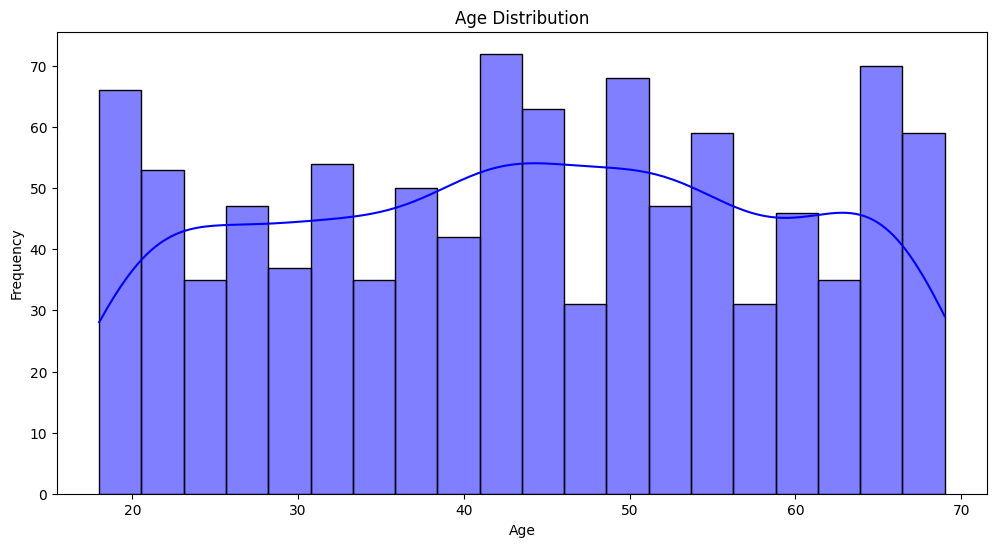

In [184]:
# Plotting the distribution of numerical features
plt.figure(figsize=(12, 6))

# Age distribution
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

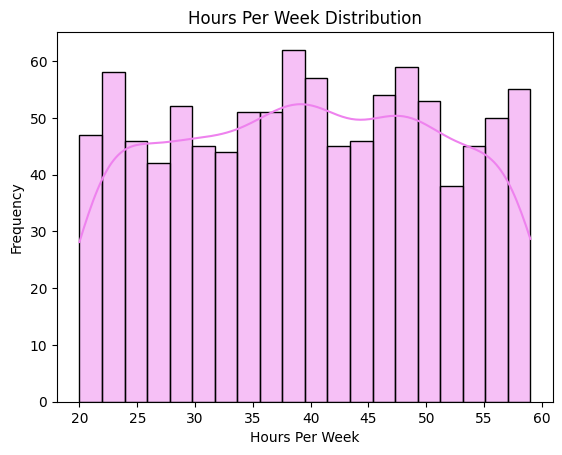

In [185]:
# Hours Per Week distribution
sns.histplot(data['Hours Per Week'], kde=True, bins=20, color='violet')
plt.title('Hours Per Week Distribution')
plt.xlabel('Hours Per Week')
plt.ylabel('Frequency')
plt.show()

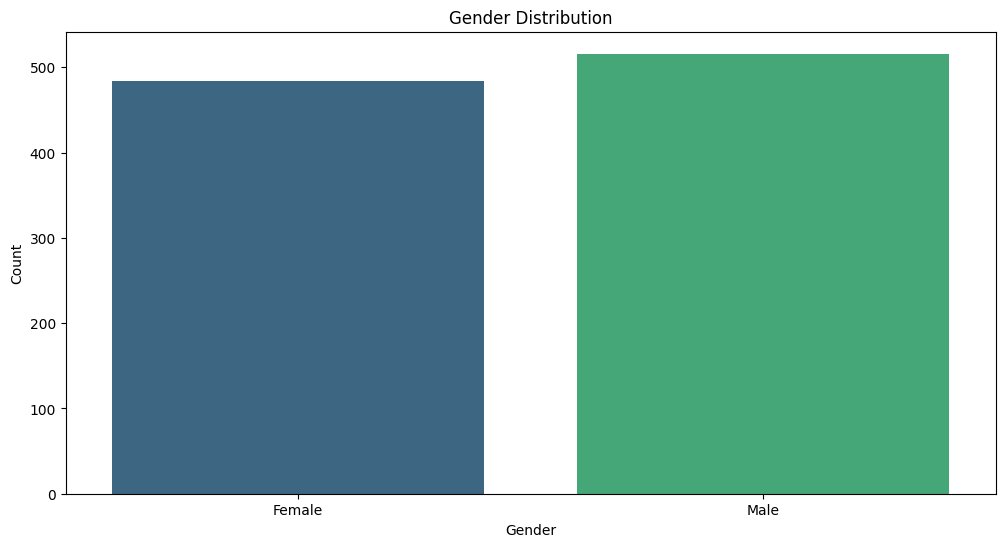

In [186]:
# Plotting the distribution of categorical features
plt.figure(figsize=(12, 6))

# Gender distribution
sns.countplot(data=data, x='Gender', hue='Gender', palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

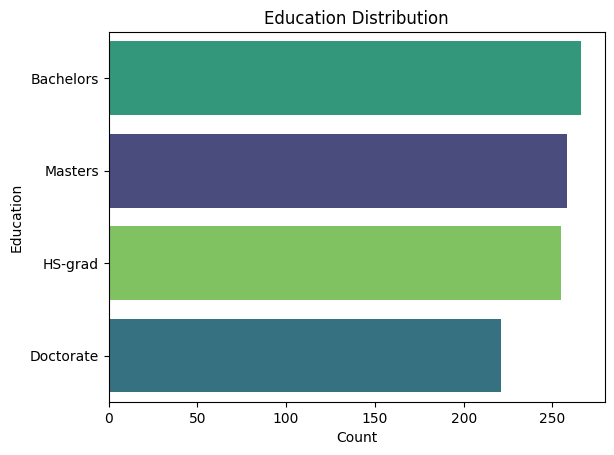

In [187]:
# Education distribution
sns.countplot(
    data=data,
    y='Education',
    order=data['Education'].value_counts().index, hue='Education',
    palette='viridis'  # Assign a color palette here
)
plt.title('Education Distribution')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()

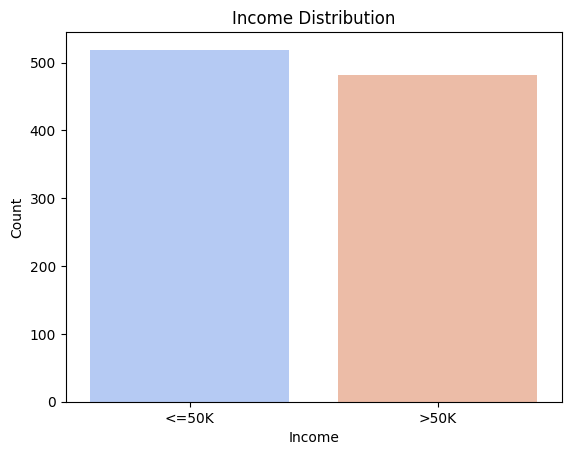

In [188]:
# Plotting the distribution of the target variable
sns.countplot(data=data, x='Income', hue='Income', palette='coolwarm')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

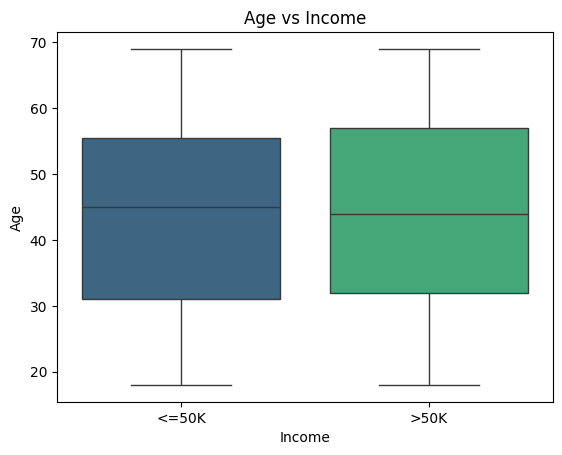

In [189]:
# Analyzing Age vs Income
sns.boxplot(data=data, x='Income', y='Age', hue='Income', palette='viridis')
plt.title('Age vs Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

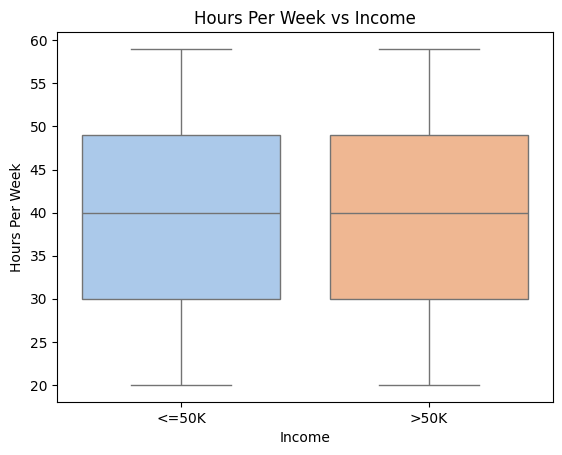

In [190]:
# Analyzing Hours Per Week vs Income
sns.boxplot(data=data, x='Income', y='Hours Per Week', hue='Income', palette='pastel')
plt.title('Hours Per Week vs Income')
plt.xlabel('Income')
plt.ylabel('Hours Per Week')
plt.show()

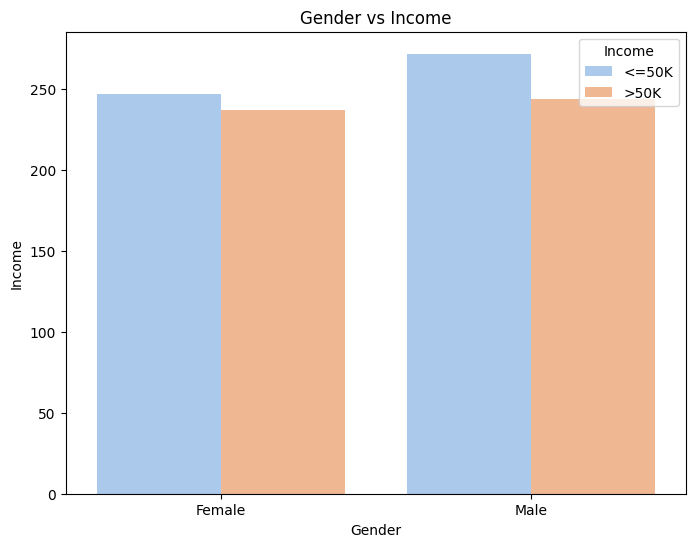

In [191]:
# Plotting the relationship between Gender and Income
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Gender", hue="Income", palette="pastel")
plt.title("Gender vs Income")
plt.xlabel("Gender")
plt.ylabel("Income")
plt.legend(title="Income")
plt.show()

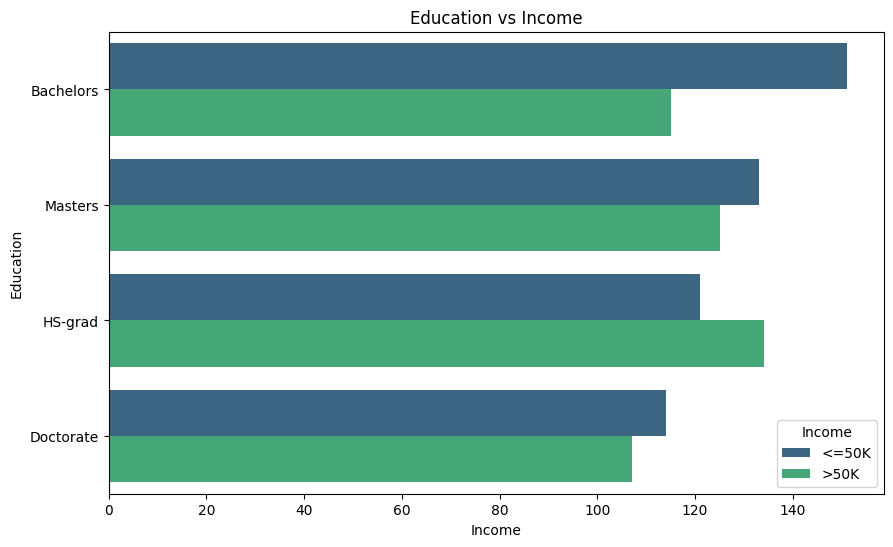

In [192]:
# Plotting the relationship between Education and Income
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y="Education", hue="Income", palette="viridis", order=data['Education'].value_counts().index)
plt.title("Education vs Income")
plt.xlabel("Income")
plt.ylabel("Education")
plt.legend(title="Income")
plt.show()

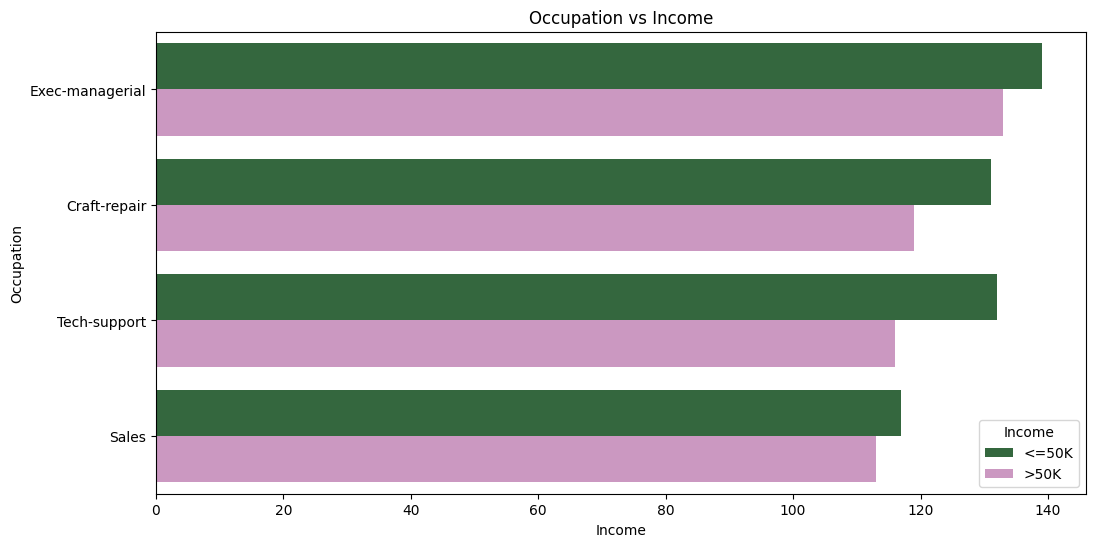

In [193]:
# Plotting the relationship between Occupation and Income
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y="Occupation", hue="Income", palette="cubehelix", order=data['Occupation'].value_counts().index)
plt.title("Occupation vs Income")
plt.xlabel("Income")
plt.ylabel("Occupation")
plt.legend(title="Income")
plt.show()

In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separating features and target variable
X = data.drop(columns=["Income"])
y = data["Income"]

# Identifying categorical and numerical features
categorical_features = ["Gender", "Education", "Marital Status", "Occupation"]
numerical_features = ["Age", "Hours Per Week"]

# Preprocessing for numerical data: Standardization
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: One-Hot Encoding
categorical_transformer = OneHotEncoder(drop="first", sparse_output=False)

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Applying preprocessing to the training and testing sets
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

In [195]:
# Applying SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

# Checking class distribution before and after SMOTE
print("Class distribution before balancing:", Counter(y_train))
print("Class distribution after balancing:", Counter(y_train_balanced))

Class distribution before balancing: Counter({'<=50K': 415, '>50K': 385})
Class distribution after balancing: Counter({'>50K': 415, '<=50K': 415})


In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Initializing and training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the value of n_neighbors for better performance
knn.fit(X_train_balanced, y_train_balanced)

# Predictions on the test set
y_pred_knn = knn.predict(X_test_processed)

# Evaluation Metrics
print("KNN Metrics with Balanced Dataset:")
print(classification_report(y_test, y_pred_knn))

KNN Metrics with Balanced Dataset:
              precision    recall  f1-score   support

       <=50K       0.50      0.51      0.50       104
        >50K       0.45      0.44      0.44        96

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200



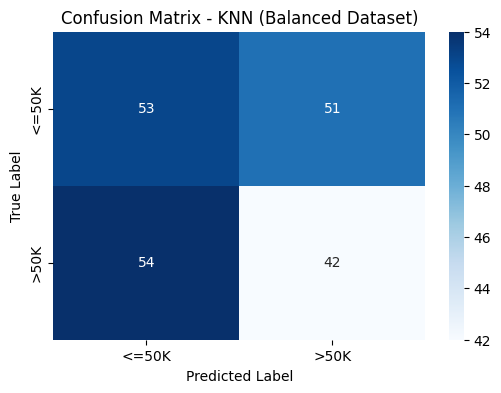

In [197]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Confusion Matrix - KNN (Balanced Dataset)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/var/folders/8y/6pzdp0tn1dg7n4p8fh2sjk8m0000gn/T/ipykernel_99517/3254424595.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="gray")


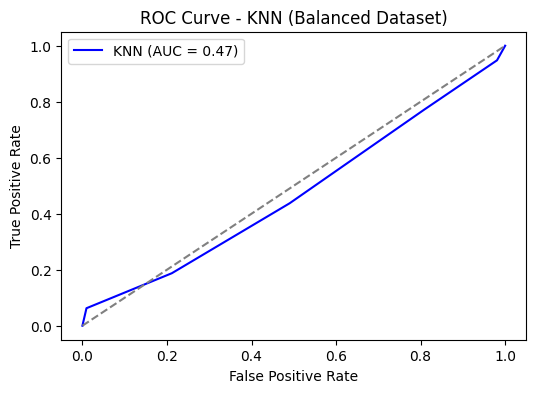

In [198]:
# ROC Curve
y_pred_prob_knn = knn.predict_proba(X_test_processed)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test.map({"<=50K": 0, ">50K": 1}), y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", color="gray")
plt.title("ROC Curve - KNN (Balanced Dataset)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Hyperparameter Tuning: Configuring Random Forest
rf_balanced = RandomForestClassifier(
    n_estimators=200,       # Increase the number of trees
    max_depth=15,           # Limit the depth of trees to prevent overfitting
    min_samples_split=5,    # Minimum samples required to split an internal node
    min_samples_leaf=2,     # Minimum samples required at a leaf node
    class_weight='balanced',# Handling class imbalance
    random_state=42
)

# Training Random Forest on Balanced Dataset
rf_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions on the Test Set
y_pred_rf_balanced = rf_balanced.predict(X_test_processed)

# Evaluation Metrics
print("Random Forest Metrics with Balanced Dataset:")
print(classification_report(y_test, y_pred_rf_balanced))

Random Forest Metrics with Balanced Dataset:
              precision    recall  f1-score   support

       <=50K       0.50      0.54      0.52       104
        >50K       0.45      0.41      0.43        96

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200



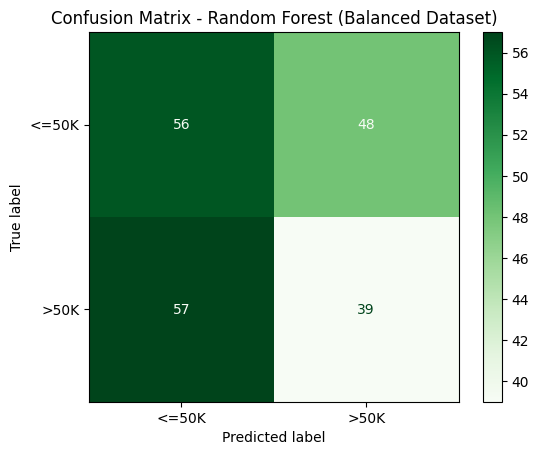

In [200]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    rf_balanced, X_test_processed, y_test, display_labels=["<=50K", ">50K"], cmap="Greens"
)
plt.title("Confusion Matrix - Random Forest (Balanced Dataset)")
plt.show()

/var/folders/8y/6pzdp0tn1dg7n4p8fh2sjk8m0000gn/T/ipykernel_99517/116990119.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="gray")  # Diagonal line


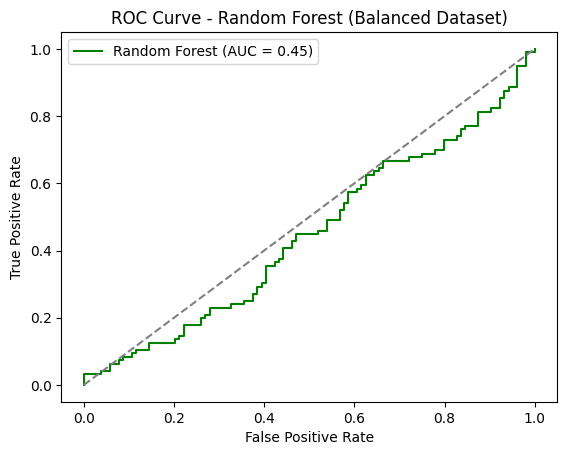

In [201]:
# ROC Curve
y_pred_prob_rf_balanced = rf_balanced.predict_proba(X_test_processed)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test.map({"<=50K": 0, ">50K": 1}), y_pred_prob_rf_balanced)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="green")
plt.plot([0, 1], [0, 1], "k--", color="gray")  # Diagonal line
plt.title("ROC Curve - Random Forest (Balanced Dataset)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

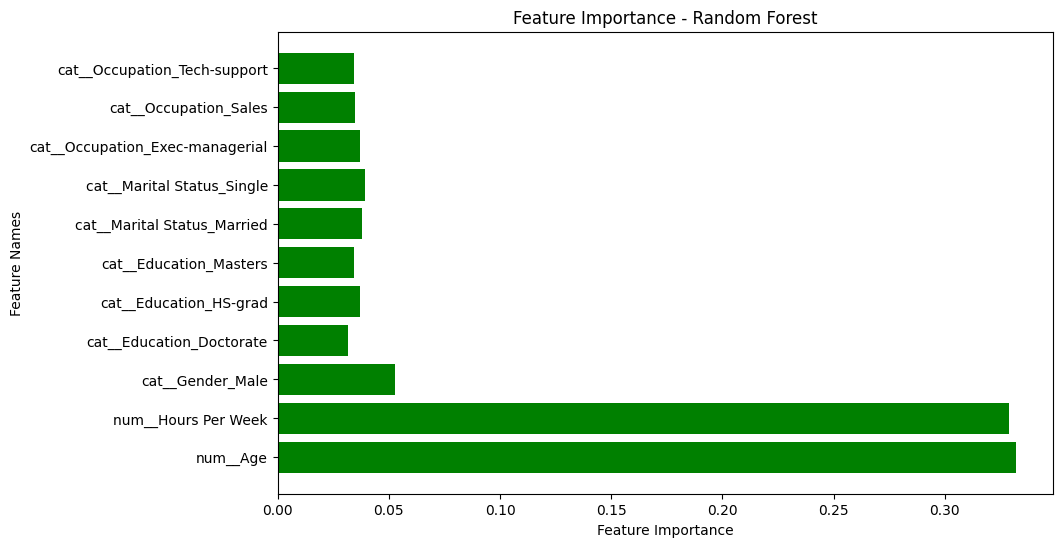

In [202]:
# Feature Importance
feature_importances = rf_balanced.feature_importances_
feature_names = preprocessing_pipeline.named_steps["preprocessor"].get_feature_names_out()

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color="green")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance - Random Forest")
plt.show()

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to evaluate and summarize model performance
def evaluate_model(model_name, y_test, y_pred, y_pred_proba):
    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
    precision = precision_score(y_test, y_pred, pos_label=">50K")
    recall = recall_score(y_test, y_pred, pos_label=">50K")
    f1 = f1_score(y_test, y_pred, pos_label=">50K")
    roc_auc = roc_auc_score(y_test.map({"<=50K": 0, ">50K": 1}), y_pred_proba)
    return {
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    }

# Evaluate KNN
knn_metrics = evaluate_model("KNN", y_test, y_pred_knn, y_pred_prob_knn)

# Evaluate Random Forest
rf_metrics = evaluate_model("Random Forest", y_test, y_pred_rf_balanced, y_pred_prob_rf_balanced)

# Combine the results into a DataFrame
comparison_df = pd.DataFrame([knn_metrics, rf_metrics])

# Display the comparison
print(comparison_df)

           Model  Precision   Recall  F1-Score   ROC AUC
0            KNN   0.451613  0.43750  0.444444  0.471855
1  Random Forest   0.448276  0.40625  0.426230  0.447416


<Figure size 1000x600 with 0 Axes>

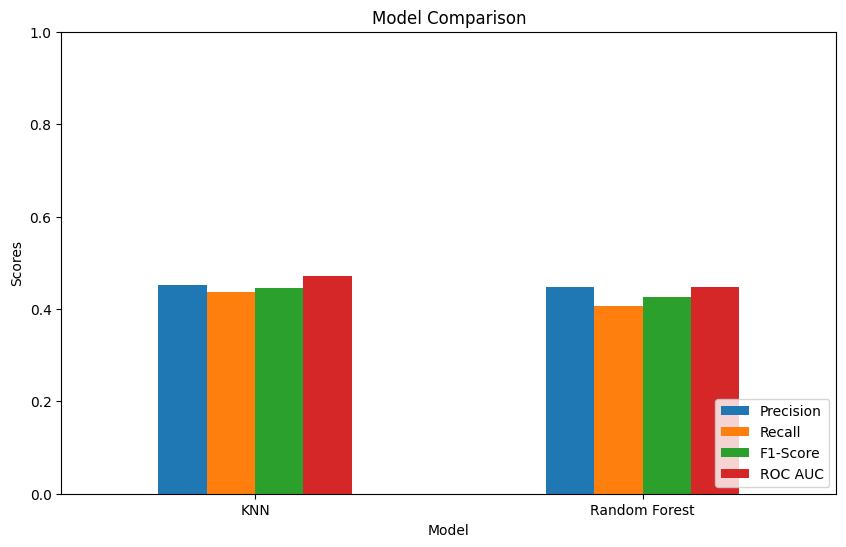

In [204]:
# Visualize the comparison
plt.figure(figsize=(10, 6))
comparison_df.set_index("Model")[["Precision", "Recall", "F1-Score", "ROC AUC"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Scores")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

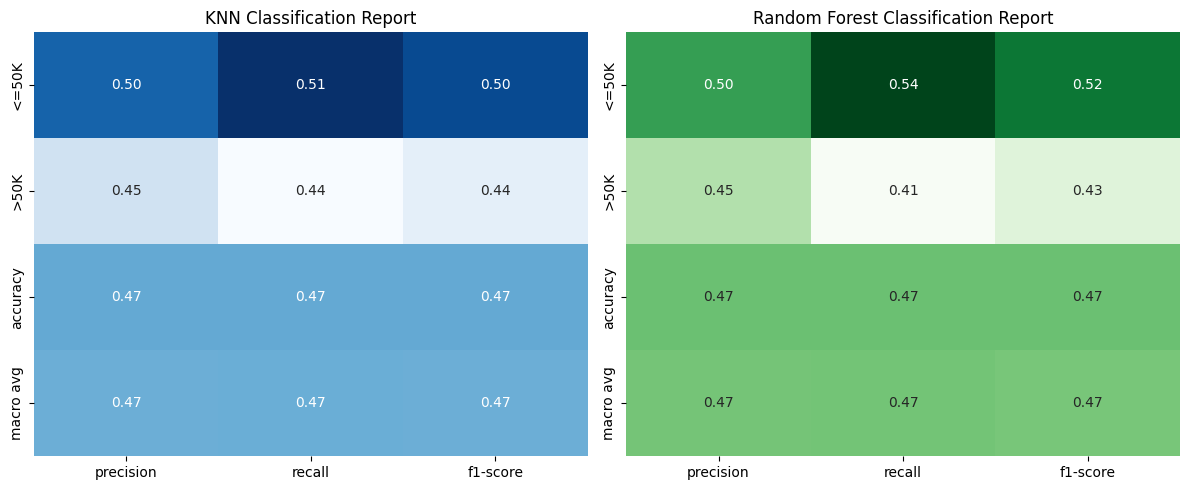

In [205]:
from sklearn.metrics import classification_report
import seaborn as sns

# Generate classification reports
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf_balanced, output_dict=True)

# Convert to DataFrames
df_report_knn = pd.DataFrame(report_knn).transpose()
df_report_rf = pd.DataFrame(report_rf).transpose()

# Plotting heatmaps
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df_report_knn.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=False)
plt.title("KNN Classification Report")

plt.subplot(1, 2, 2)
sns.heatmap(df_report_rf.iloc[:-1, :-1], annot=True, cmap="Greens", fmt=".2f", cbar=False)
plt.title("Random Forest Classification Report")
plt.tight_layout()
plt.show()